# 提升方法

在PAC的框架下，一个概念是强可学习的充要条件是这个概念是弱可学习的；
- 这个方法是找到一系列弱分类器，然后组合成一个强分类器；
- 问题：如何较好的找到或者说学习弱分类器；又如何组合这些弱分类器？

# AdaBoost

- 下面是一个迭代的过程：
    - 对每个样本给予对应的权重（初始的时候，样本的权重是相等的）
    - 使用具有权重分布的数据集，训练一个新的分类器；
    - 使用样本的权重计算累计误差率（公式：sum(权重*样本分类结果的指示函数)）
    - 基于累计误差率，给定当前分类器的系数；
    - 更新权重分布，回到1，直到所有的弱分类训练完毕
- 构建一个基本分类器的线性组合
adaboost的思想是：1、增大误分类样本的权重，提高下一个分类器对于误分类样本的关注度；2、分类器的权重同误分类的样本数量直接相关；

## 不使用adaboot的决策树

In [18]:
from sklearn.tree import DecisionTreeClassifier

treeClf = DecisionTreeClassifier(max_depth=1,criterion="gini")


In [19]:
import numpy as np
x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])

In [20]:
treeClf.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(
    treeClf,
    out_file="./result/test_tree.dot",
    rounded=True,
    filled=True
)

In [22]:
# 转换图像
! dot -Tpng ./result/test_tree.dot -o ./result/test_tree.png

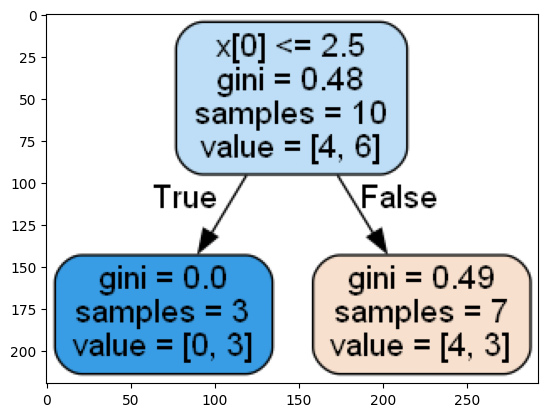

In [29]:
import matplotlib.pyplot as plt
# from PIL import Image
# Image.open("./result/test_tree.png").show()
im = plt.imread('./result/test_tree.png')
plt.imshow(im)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
# 准确率为0.7
accuracy_score(y,treeClf.predict(x))

0.7

## 使用adaboost的决策树

In [30]:
from sklearn.ensemble import AdaBoostClassifier

treeClf = DecisionTreeClassifier(max_depth=1,criterion="gini")
treeAdaboost = AdaBoostClassifier(treeClf,n_estimators=3,random_state=520)
treeAdaboost.fit(x,y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=3, random_state=520)

In [31]:
treeAdaboost.estimators_
for i in range(len(treeAdaboost.estimators_)):
    export_graphviz(
        treeAdaboost.estimators_[i],
        out_file="./result/test_tree_{}.dot".format(i),
        rounded=True,
        filled=True
    )
print(treeAdaboost.estimator_weights_)

[1. 1. 1.]


In [32]:
# 转换图像
! dot -Tpng ./result/test_tree_0.dot -o ./result/test_tree_0.png
# 转换图像
! dot -Tpng ./result/test_tree_1.dot -o ./result/test_tree_1.png
# 转换图像
! dot -Tpng ./result/test_tree_2.dot -o ./result/test_tree_2.png

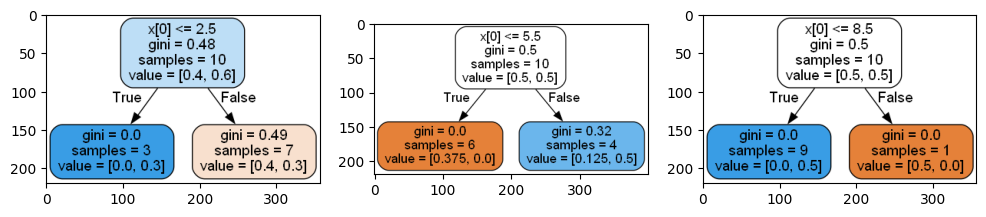

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(131)
im = plt.imread('./result/test_tree_0.png')
plt.imshow(im)
plt.subplot(132)
im = plt.imread('./result/test_tree_1.png')
plt.imshow(im)
plt.subplot(133)
im = plt.imread('./result/test_tree_2.png')
plt.imshow(im)

plt.show()

In [37]:
from sklearn.metrics import accuracy_score
# 准确率为1.0
accuracy_score(y,treeAdaboost.predict(x))

1.0